In [2]:
import torch 
from src.distill_datasets import SimpleDataset
from fairchem.core.common.registry import registry

In [12]:
force_jac_dataset = SimpleDataset('/data/shared/ishan_stuff/labels_unlocked/mace_off_large_SpiceMonomers/force_jacobians')
# force_jac_dataset = SimpleDataset('labels/ethanol_1k_distributed_test/force_jacobians')
# force_jac_dataset = SimpleDataset('labels/AT_AT_all_gemnet_t_proper/force_jacobians')
# force_jac_dataset = SimpleDataset('labels/mace_off_large_SpiceMonomersNEW/force_jacobians')


# dataset_path = '/data/ishan-amin/spice_separated/DES370K_Monomers/train'
dataset_path = '/data/shared/ishan_stuff/spice_separated/DES370K_Monomers/train'
# dataset_path = '/data/shared/MLFF/MD22/95_lmdb/AT-AT/train'
# dataset_path = '/data/ishan-amin/post_data/md17/ethanol/1k/train'
config = {"src": dataset_path}
dataset = registry.get_dataset_class("lmdb")(config)
# print(force_jac_dataset[20].reshape(126, 126))

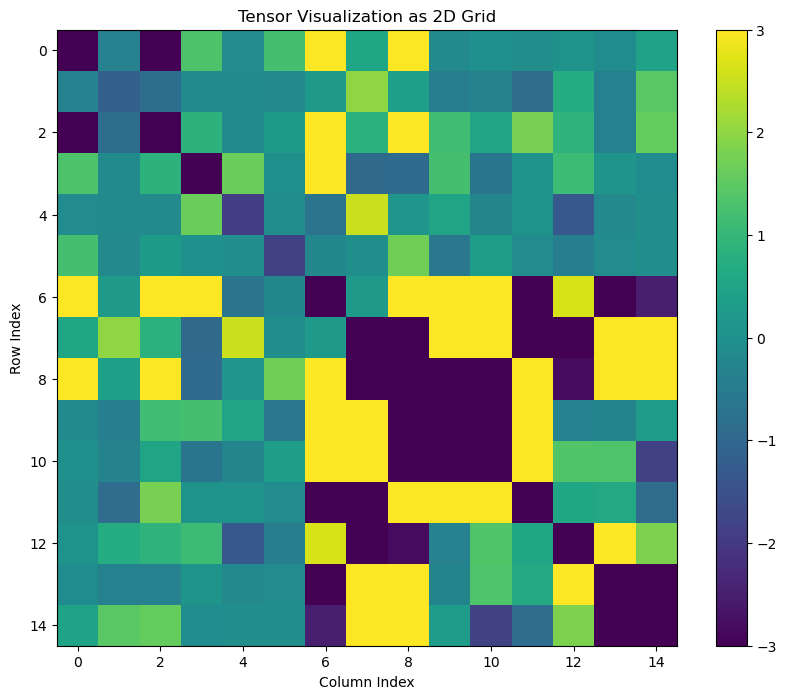

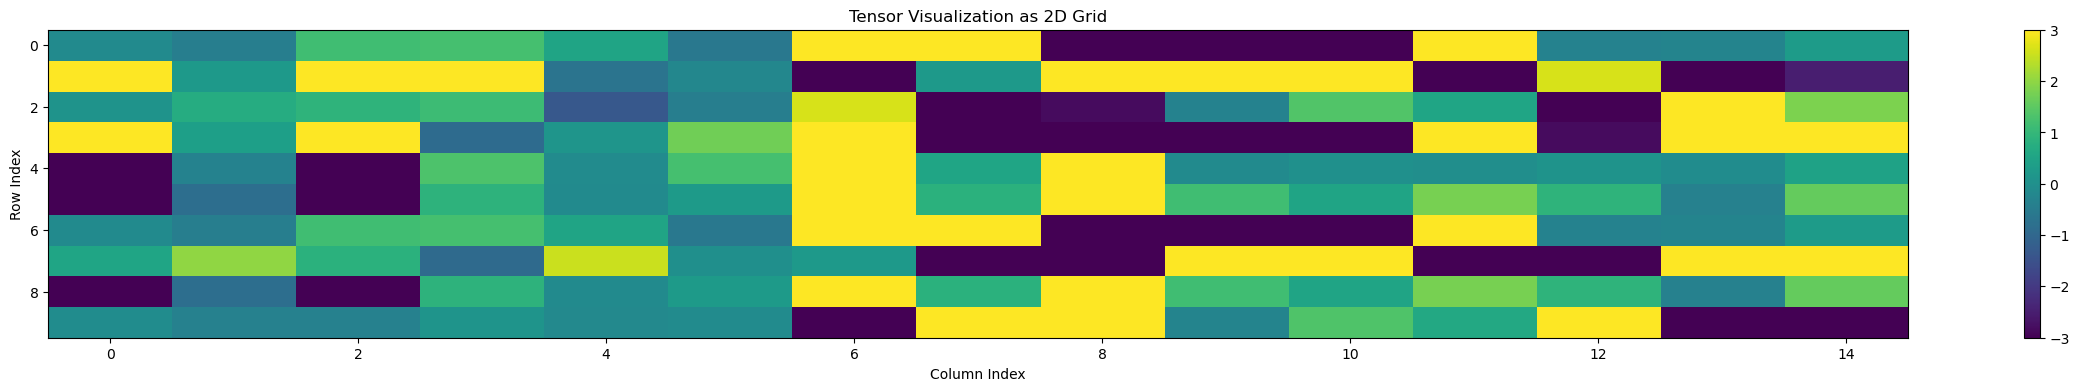

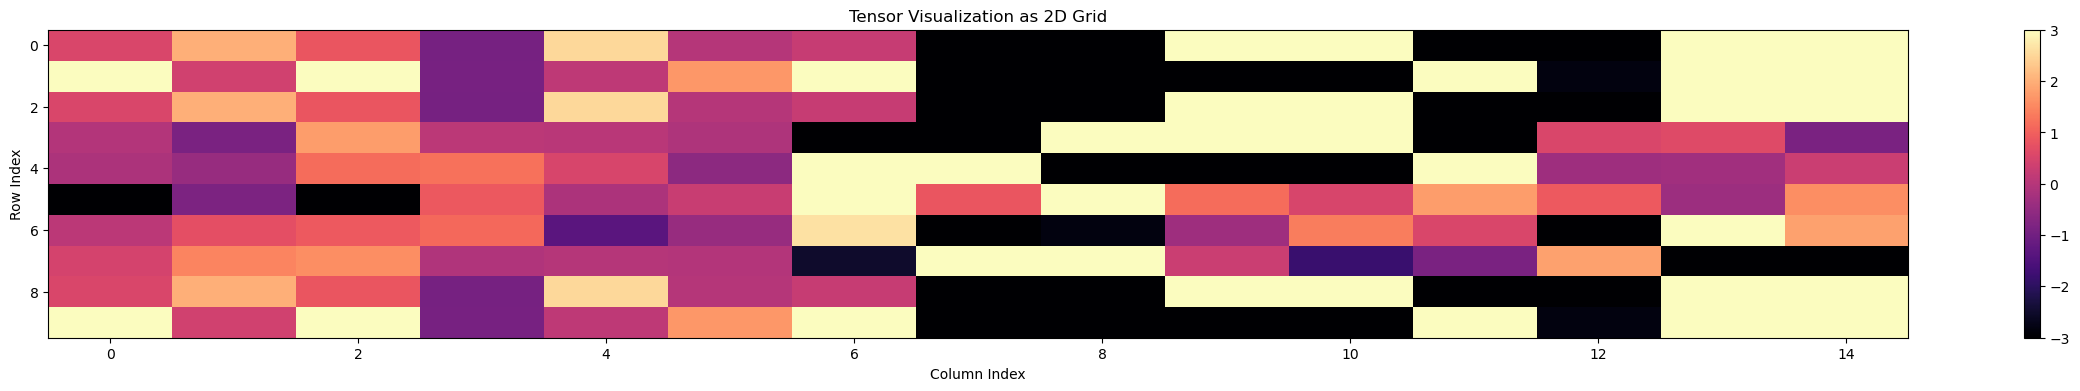

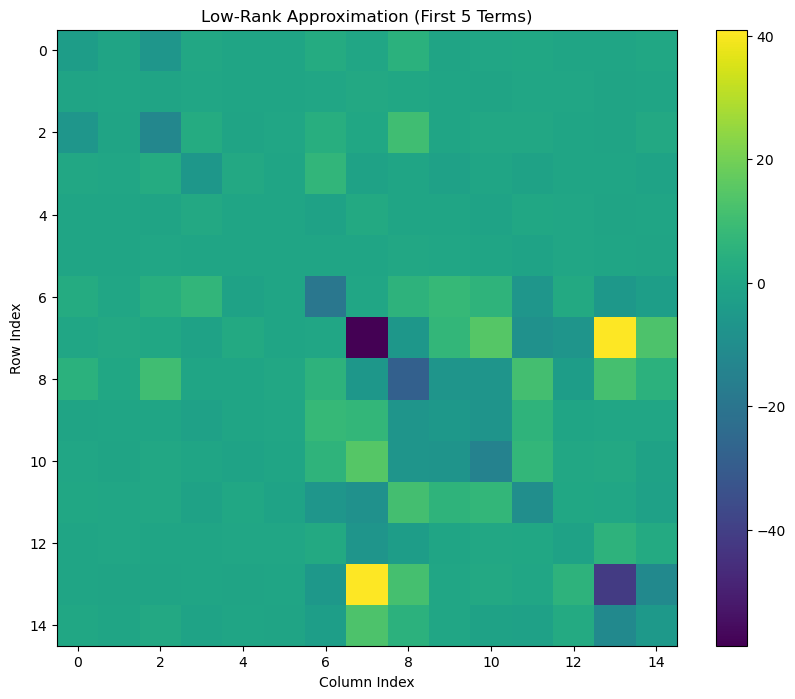

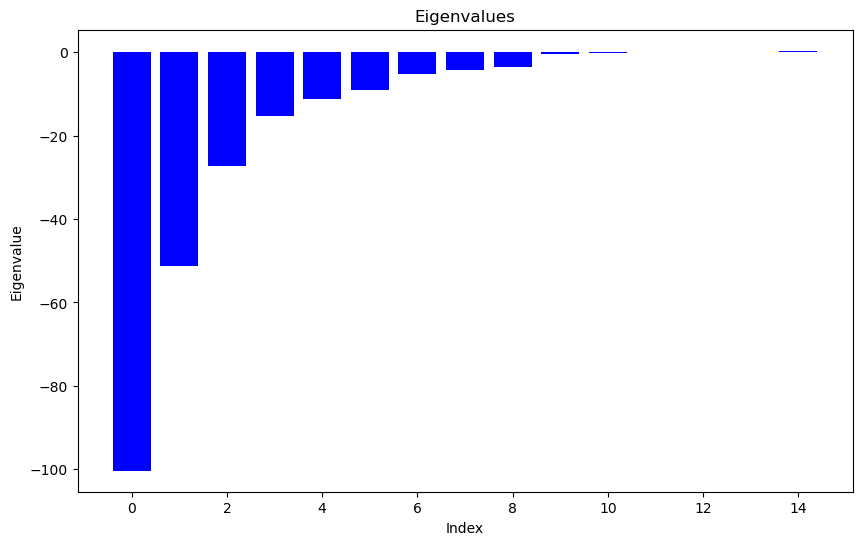

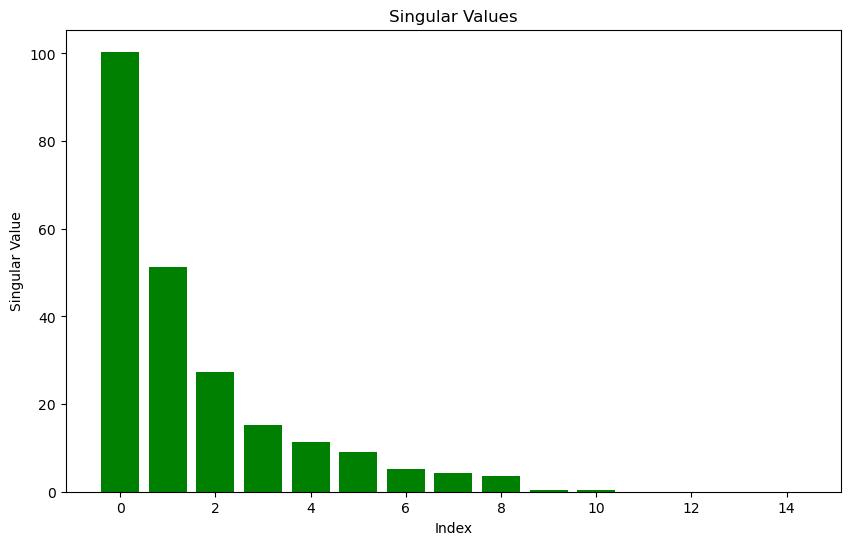

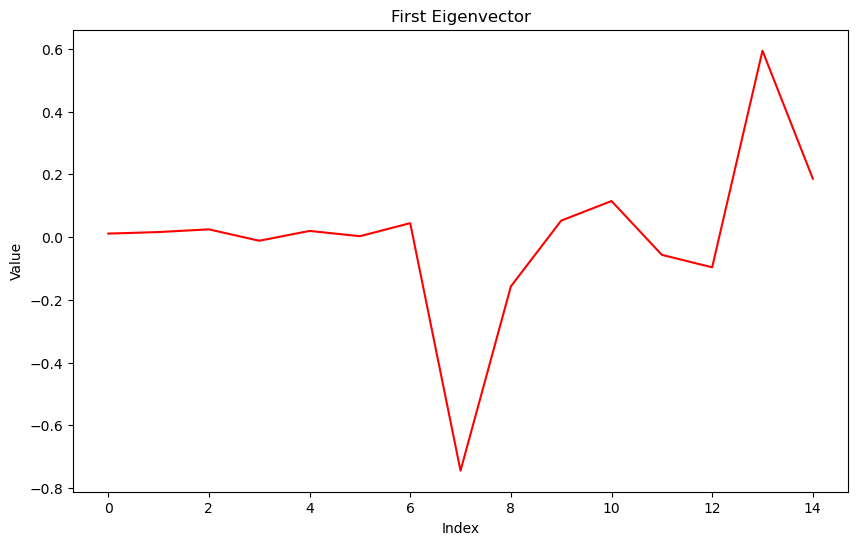

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming we have the dataset as mentioned by the user
# Here I'm creating a random tensor as a placeholder for the actual data
# because I don't have access to the user's data

# Replace this with actual data if available:
idx = 0 # small system with 5 atoms
natoms = dataset[idx].natoms
# tensors = [force_jac_dataset[idx] for idx in range(300)]
# tensors = torch.stack(tensors).reshape(300, 3*natoms, 3*natoms)
# tensor = tensors.std(dim=0)

tensor = force_jac_dataset[idx].reshape(3*natoms, 3*natoms)


# Visualize the tensor as a 2D grid
plt.figure(figsize=(10, 8))
plt.imshow(tensor, cmap='viridis', aspect='auto', vmin=-3, vmax=3)
plt.colorbar()
plt.title('Tensor Visualization as 2D Grid')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.savefig('hessian.png')
plt.show()

# Plot randomly subsampled rows of the Hessian tensor
plt.figure(figsize=(30, 4))
tensor_rows = tensor[np.random.choice(tensor.shape[0], 10)]
plt.imshow(tensor_rows, cmap='viridis', aspect='auto', vmin=-3, vmax=3)
plt.colorbar()
plt.title('Tensor Visualization as 2D Grid')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.savefig('hessian_subsampled.png')
plt.show()

plt.figure(figsize=(30, 4))
tensor_rows = tensor[np.random.choice(tensor.shape[0], 10)]
plt.imshow(tensor_rows, cmap='magma', aspect='auto', vmin=-3, vmax=3)
plt.colorbar()
plt.title('Tensor Visualization as 2D Grid')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.savefig('hessian_subsampled_student.png')
plt.show()



# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(tensor)
# Compute singular values
u, s, vh = np.linalg.svd(tensor)

# Reconstruct the matrix using the first 5 terms of its low-rank decomposition
low_rank_approximation = np.zeros_like(tensor)

for i in range(5):
    low_rank_approximation += s[i] * np.outer(u[:, i], vh[i, :])

# Visualize the low-rank approximation
plt.figure(figsize=(10, 8))
plt.imshow(low_rank_approximation, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Low-Rank Approximation (First 5 Terms)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')



plt.show()

# Visualize the eigenvalues (as a bar plot for simplicity)
plt.figure(figsize=(10, 6))
plt.bar(range(len(eigenvalues)), np.sort(eigenvalues), color='blue')
plt.title('Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()


# Visualize singular values (as a bar plot for simplicity)
plt.figure(figsize=(10, 6))
plt.bar(range(len(s)), s, color='green')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.show()

# Visualizing the first eigenvector as an example
plt.figure(figsize=(10, 6))
plt.plot(eigenvectors[:, 0], color='red')
plt.title('First Eigenvector')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()
